# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "C:/Users/TheuriM/BootCamp/Challenges/Matplotlib_Challenge/Mouse_metadata.csv"
study_results_path = "C:/Users/TheuriM/BootCamp/Challenges/Matplotlib_Challenge/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pypharma_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
pypharma_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
mice_count = pypharma_df["Mouse ID"].nunique()
mice_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
ID_timepoint = pd.DataFrame(pypharma_df[["Mouse ID", "Timepoint"]])
duplicate_ID = ID_timepoint[ID_timepoint.duplicated(subset=["Mouse ID", "Timepoint"],keep=False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_ID=duplicate_ID['Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_ID_Data = pypharma_df[pypharma_df['Mouse ID'].isin(duplicate_ID)]
duplicate_ID_Data 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_pypharma_df = pypharma_df[pypharma_df["Mouse ID"]. isin(duplicate_ID)==False]
clean_pypharma_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_pypharma_df=len(clean_pypharma_df['Mouse ID'].unique())
clean_pypharma_df

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = pypharma_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = pypharma_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = pypharma_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev = pypharma_df.groupby("Drug Regimen")["Tumor Volume (mm3)"] .std()
sem = pypharma_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({
    "Mean Tumor Volume (mm3)":mean,
    'Median Tumor Volume (mm3)': median,
    'Variance -Tumor Volume (mm3)': variance,
    'Tumor Volume STd. Dev. (mm3)':std_dev,
    'Tumor Volume Std error':sem
})

summary_df


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance -Tumor Volume (mm3),Tumor Volume STd. Dev. (mm3),Tumor Volume Std error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
advanced_Summary_df = pypharma_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean',"median","var","std", "sem"])
advanced_Summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

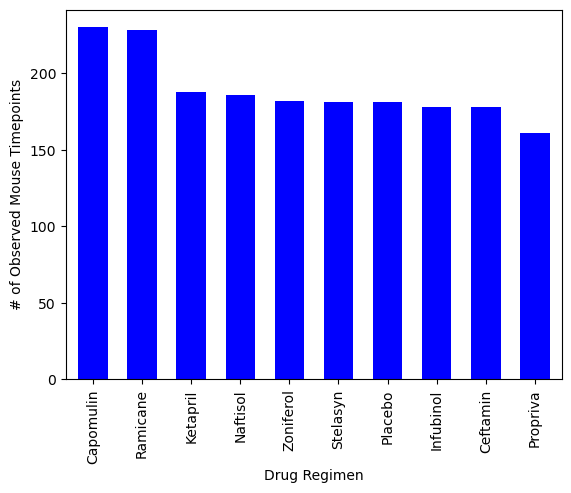

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# count of mice tested for each regimen
drug_regimen_df= pypharma_df["Drug Regimen"].value_counts()
# plotting in Pandas
drug_regimen_df.plot(kind="bar", color = "b", align="center",width=0.6, xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints" )
plt.show()

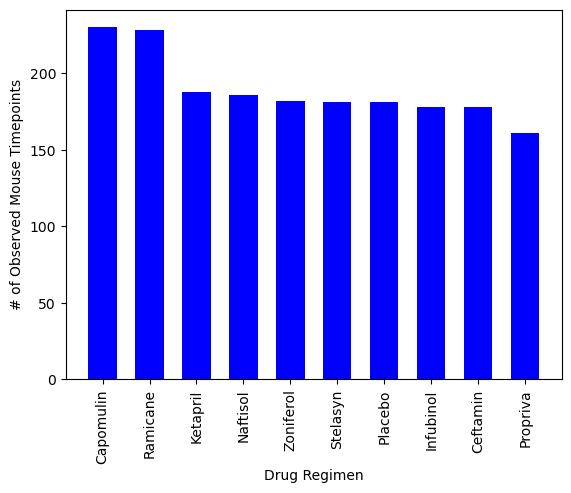

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen_df.index,drug_regimen_df.values, color='b',align='center', width=0.6)

# Attaching labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# To prevent overlap of ticks, rotate at 90 degrees
plt.xticks(rotation=90)

plt.show()


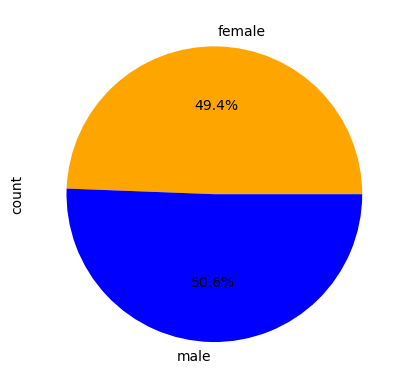

In [16]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_df = pypharma_df.groupby("Sex").size()
pandas_pie_df=gender_df
pandas_pie_df=gender_df.plot(kind='pie',autopct='%1.1f%%', colors=['orange','blue'], labels=['female', 'male'])

# Make the pie chart
plt.ylabel('count')

plt.show()

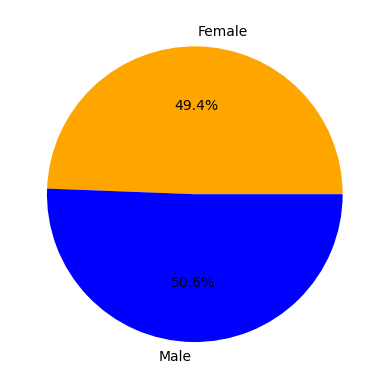

In [17]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender_df=pypharma_df.groupby('Sex').size()
pie_plot=plt.pie(gender_df,labels=['Female','Male' ], colors=['orange','blue'], autopct ='%1.1f%%' )

# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
regimens=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
regimens_df=pypharma_df[pypharma_df['Drug Regimen'].isin(regimens)]

last_timepoint=regimens_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_df=pd.DataFrame(last_timepoint)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_df=pd.merge(last_timepoint_df,pypharma_df, how='left', on=['Mouse ID','Timepoint'])

last_tumor_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    tumor_volume_data = last_tumor_df.loc[last_tumor_df['Drug Regimen']==treatment,'Tumor Volume (mm3)'] 
    quartiles = tumor_volume_data.quantile([.25,.5,.75])
    lowerquart = quartiles[0.25]
    upperquart = quartiles[0.75]
    iqr = upperquart-lowerquart

# Determine outliers using upper and lower bounds 
    lower_bound = lowerquart - (1.5*iqr)
    upper_bound = upperquart + (1.5*iqr)
    outliers = tumor_volume_data.loc[(tumor_volume_data < lower_bound) | (tumor_volume_data > upper_bound )]

    print(f"{treatment}  potential outliers: {outliers}") 






Capomulin  potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane  potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol  potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin  potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\TheuriM\AppData\Local\Temp\ipykernel_8208\1356891465.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([last_tumor_df.loc[last_tumor_df['Drug Regimen']=='Capomulin','Tumor Volume (mm3)'],


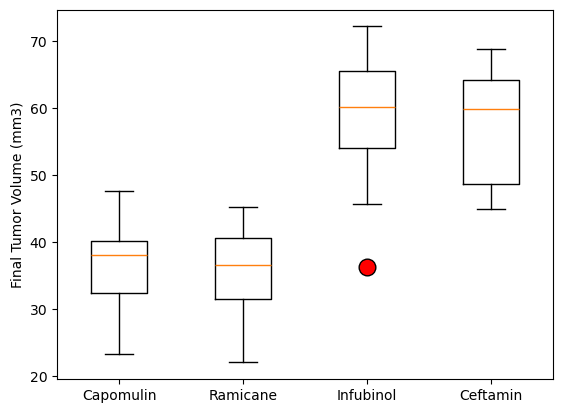

In [28]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot([last_tumor_df.loc[last_tumor_df['Drug Regimen']=='Capomulin','Tumor Volume (mm3)'],
             last_tumor_df.loc[last_tumor_df['Drug Regimen']=='Ramicane', 'Tumor Volume (mm3)'],
             last_tumor_df.loc[last_tumor_df['Drug Regimen']=='Infubinol', 'Tumor Volume (mm3)'],
             last_tumor_df.loc[last_tumor_df['Drug Regimen']=='Ceftamin', 'Tumor Volume (mm3)']],
             labels=treatments, flierprops=dict(marker='o', markerfacecolor='r', markersize=12)
              )
# Labelling
plt.ylabel ( 'Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

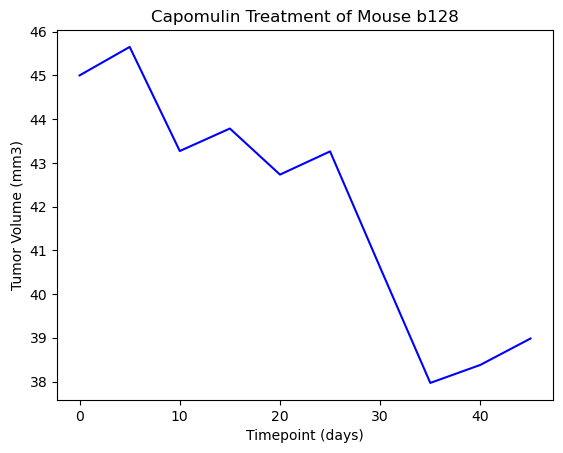

In [48]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_tr = pypharma_df[(pypharma_df['Drug Regimen']=='Capomulin')&(pypharma_df['Mouse ID']== 'b128')]

fig, lineplot = plt.subplots()
lineplot.plot(capomulin_tr['Timepoint'], capomulin_tr['Tumor Volume (mm3)'], color='b', linestyle= '-')

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse b128')



plt.show()

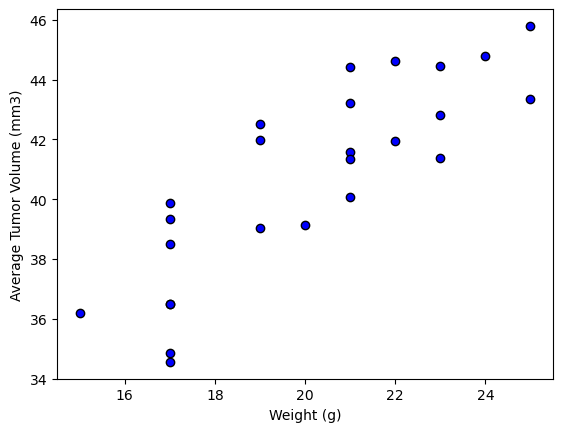

In [50]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg=pypharma_df[pypharma_df['Drug Regimen']== 'Capomulin'].groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()
fig1, scatplot = plt.subplots()
scatplot.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'], marker='o', facecolors='b', edgecolors='k')
scatplot.set_xlabel('Weight (g)')
scatplot.set_ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation between mouse weight & aveergaee tumor volume is 0.84


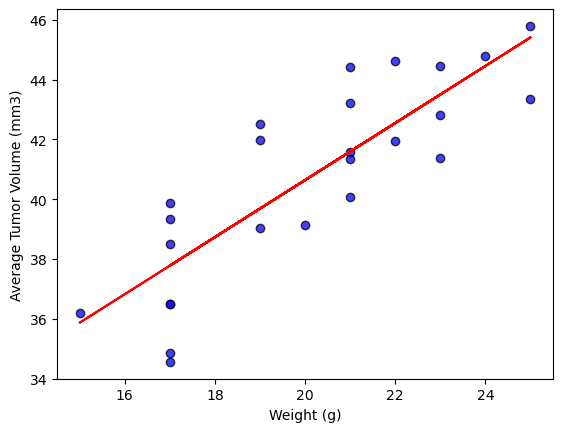

In [57]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient= capomulin_avg['Weight (g)']. corr(capomulin_avg['Tumor Volume (mm3)'])
slope, intercept, r_value, p_value, std_err = stats.linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
print(f"Correlation between mouse weight & aveergaee tumor volume is{correlation_coefficient: .2f}")

capomulin_avg = pypharma_df.loc[pypharma_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
                                   
fig1, correg = plt.subplots()
correg.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)
correg.plot(capomulin_avg["Weight (g)"], slope * capomulin_avg["Weight (g)"] + intercept, color="r", label="Linear Regression")
correg.set_xlabel("Weight (g)")
correg.set_ylabel("Average Tumor Volume (mm3)")
plt.show()

